> ### Note on Labs and Assignments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 5: EDA

## Outline

- Univariate analysis (distributions, histograms, counts)
- Bivariate analysis (correlations, scatterplots, group comparisons)
- Reflections and insights

This lab uses the same dataset from **Lab 4**. You will see some overlap in the initial tasks as the data is cleaned.  

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_05_eda.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Overview

We will be using the same San Francisco rent dataset as in Lab 4.  Some rentals are apartments, others are for homes, and there may be some other random properties for rent.  Each row represents one rental listing.

**Dataset:** `rent.csv`  
Source: [TidyTuesday – 2022-07-05](https://github.com/rfordatascience/tidytuesday/blob/main/data/2022/2022-07-05/rent.csv)

| Variable       | Type       | Description |
|----------------|------------|-------------|
| `post_id`      | Categorical| Unique listing ID |
| `date`         | Numeric    | Listing date (numeric format) |
| `year`         | Integer    | Year of listing |
| `nhood`        | Categorical| Neighborhood |
| `city`         | Categorical| City |
| `county`       | Categorical| County |
| `price`        | Numeric    | Listing price (USD) |
| `beds`         | Numeric    | Number of bedrooms |
| `baths`        | Numeric    | Number of bathrooms |
| `sqft`         | Numeric    | Square footage |
| `room_in_apt`  | Binary     | Indicates whether the rental listing is for an entire apartment (0) or a single room within an apartment (1)|
| `address`      | Categorical| Street address |
| `lat`          | Numeric    | Latitude |
| `lon`          | Numeric    | Longitude |
| `title`        | Text       | Listing title |
| `descr`        | Text       | Listing description |
| `details`      | Text       | Additional details |


## Part 1: Importing the Data

### Instructions:
- Import the `pandas` library for dataframes.  Then `Matplotlib` and `Seaborn` for data visualization.
- Import data from the rent.csv into a dataframe from the tidytuesday link.
- Use `.info()` and `.head()` to inspect the structure and preview the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2022/2022-07-05/rent.csv'
df = pd.read_csv(url)

In [4]:
# Get summary info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200796 entries, 0 to 200795
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   post_id      200796 non-null  object 
 1   date         200796 non-null  int64  
 2   year         200796 non-null  int64  
 3   nhood        200796 non-null  object 
 4   city         200796 non-null  object 
 5   county       199402 non-null  object 
 6   price        200796 non-null  int64  
 7   beds         194188 non-null  float64
 8   baths        42675 non-null   float64
 9   sqft         64679 non-null   float64
 10  room_in_apt  200796 non-null  int64  
 11  address      3908 non-null    object 
 12  lat          7651 non-null    float64
 13  lon          4312 non-null    float64
 14  title        198279 non-null  object 
 15  descr        3254 non-null    object 
 16  details      8016 non-null    object 
dtypes: float64(5), int64(4), object(8)
memory usage: 26.0+ MB


In [5]:
# Preview the first rows
df.head()

,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details
0,pre2013_134138,20050111,2005,alameda,alameda,alameda,1250,2.0,2.0,NaN,0,NaN,NaN,NaN,$1250 / 2br - 2BR/2BA 1145 ALAMEDA DE LAS PU...,NaN,NaN
1,pre2013_135669,20050126,2005,alameda,alameda,alameda,1295,2.0,NaN,NaN,0,NaN,NaN,NaN,$1295 / 2br - Walk the Beach! 1 FREE MONTH + $...,NaN,NaN
2,pre2013_127127,20041017,2004,alameda,alameda,alameda,1100,2.0,NaN,NaN,0,NaN,NaN,NaN,$1100 / 2br - cottage,NaN,NaN
3,pre2013_68671,20120601,2012,alameda,alameda,alameda,1425,1.0,NaN,735.0,0,NaN,NaN,NaN,$1425 / 1br - 735ft² - BEST LOCATION SOUTHSHOR...,NaN,NaN
4,pre2013_127580,20041021,2004,alameda,alameda,alameda,890,1.0,NaN,NaN,0,NaN,NaN,NaN,"$890 / 1br - Classy ""Painted Lady"" VICTORIAN -...",NaN,NaN


## Part 2: Inspecting Data Quality

### Instructions:
- Check for outliers or invalid data in key numeric variables like `price`, `sqft`, `beds`, or `baths`.  The concept of outliers will be covered more in week 6.  This week we will just look for outliers, but we won't take steps to remove them.     

In [6]:
# Basic summary statistics
df[['price', 'beds', 'baths', 'sqft']].describe()

,price,beds,baths,sqft
count,200796.000000,194188.000000,42675.000000,64679.000000
mean,2135.362746,1.889025,1.679086,1201.827688
std,1427.747903,1.079138,0.690509,5000.217864
min,220.000000,0.000000,1.000000,80.000000
25%,1295.000000,1.000000,1.000000,750.000000
50%,1800.000000,2.000000,2.000000,1000.000000
75%,2505.000000,3.000000,2.000000,1360.000000
max,40000.000000,12.000000,8.000000,900000.000000


### In Your Response:
- Do any numeric variables contain extreme or unusual values?
- Should those outlier values be removed?  Or are they valid rental properties?

### ✍️ Your Response: 🔧
1. There is one value that looks very unusual as there is one rental property that is listed as not having a bed in it which cant be sold as a rental property. There is also at least one property that is listed at having 80sqft which is theory possible to live in but, is smaller than just one room in most other Apartments. Additional theere are property listed with value that exccd the average by a std by more than 4 times which is cause great variation in the std of price and sqft.
2. These two values should most likely be removed as one property is not legal to be list for rental, while the other is most likely a house that is being list on rental listings that is wildly outside the values that should normal be expected in this dataset. Some at least the min bed value and the max value for price and sqrt should be removed to adjust the dataset.

## Part 3: Univariate Analysis

Explore individual variables to understand their distributions and frequency.

### Tasks:
- Plot histograms for numeric variables (`price`, `sqft`)
- Plot countplots for categorical variables (`beds`, `nhood`)


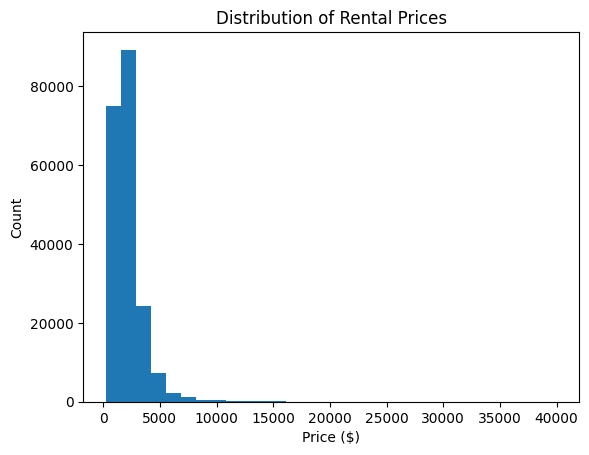

In [9]:
# Histogram: Price
plt.hist(df['price'], bins=30)
plt.title("Distribution of Rental Prices")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

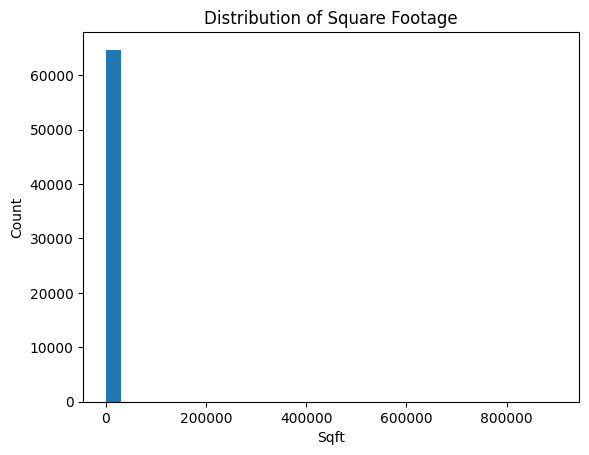

In [8]:
# Histogram: Square Footage
plt.hist(df['sqft'].dropna(), bins=30)
plt.title("Distribution of Square Footage")
plt.xlabel("Sqft")
plt.ylabel("Count")
plt.show()


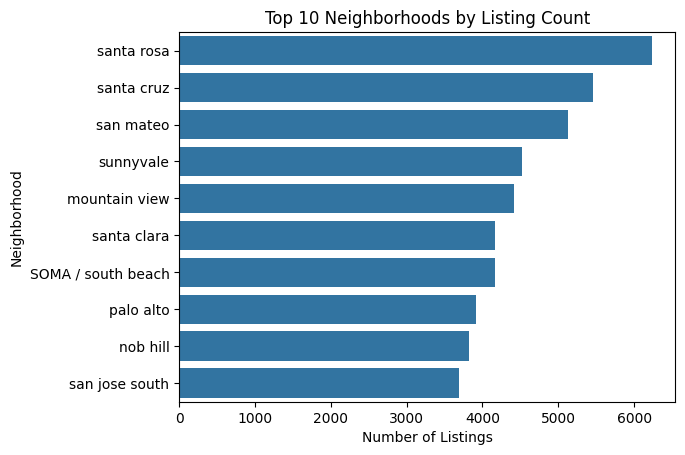

In [7]:
# Bar plot of top 10 neighborhoods by number of listings
top_nhoods = df['nhood'].value_counts().head(10)

sns.barplot(x=top_nhoods.values, y=top_nhoods.index)
plt.title("Top 10 Neighborhoods by Listing Count")
plt.xlabel("Number of Listings")
plt.ylabel("Neighborhood")
plt.show()

### 🔧 Try It Yourself – Part 4

1. Create two new visualizations using different variables than the ones already shown above.

>Suggestions:
- A **histogram** of the `baths` variable
- A **bar chart** showing the **average square footage by number of bathrooms**

> Be sure to label your axes and include a title for each chart.

### In Your Response:

After creating each of the visuals, write 1–2 sentences explaining what you notice in each.


<Axes: xlabel='baths', ylabel='Count'>

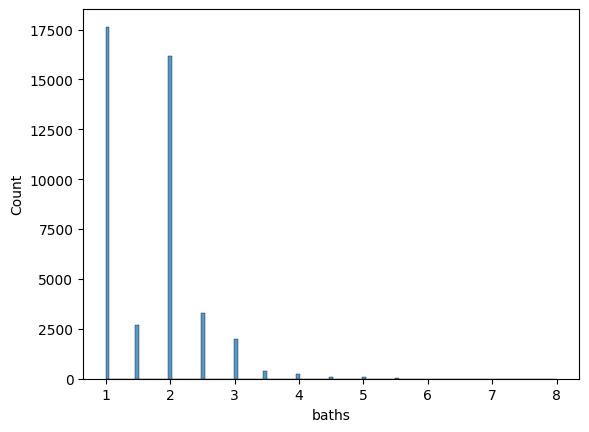

In [22]:
# Visual 1 🔧
sns.histplot(data=df,x="baths")

### ✍️ Visual 1 Response: 🔧
1. There is a heavy weigh around the first two entry values while anything beyond 2 quickly starts to disappear, So almost all the values are centered around 1-2.5 baths per apartment.

<Axes: xlabel='baths', ylabel='sqft'>

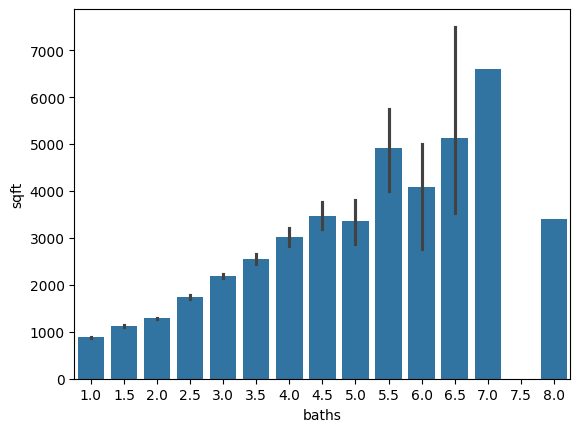

In [27]:
# Visual 2 🔧
sns.barplot(data=df,x="baths",y="sqft")

### ✍️ Visual 2 Response: 🔧
1. The error for each value gets wider and wider as there are more bathrooms per apartment, so it can be infered that the stdev for sqft grows larger the more bathrooms in the apartment. Additionally there are two values at 7 adn 8 baths that show no error bar as they are outliers from the totals from the rest of the data.

## Part 4: Bivariate Analysis

Explore relationships between two variables to understand how features like square footage or bedrooms influence price.


In [13]:
# Correlation matrix
corr_matrix = df[['price', 'beds', 'baths', 'sqft']].corr()
corr_matrix


,price,beds,baths,sqft
price,1.000000,0.450096,0.433553,0.074310
beds,0.450096,1.000000,0.651835,0.707235
baths,0.433553,0.651835,1.000000,0.645372
sqft,0.074310,0.707235,0.645372,1.000000


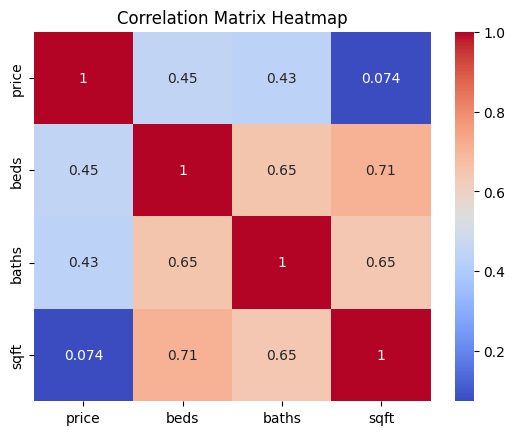

In [14]:
# Heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

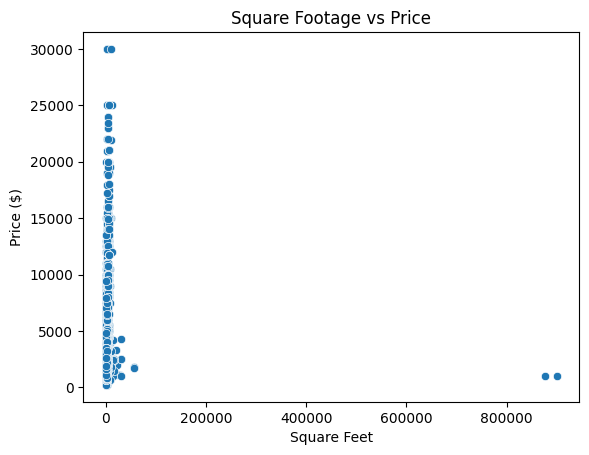

In [11]:
# Scatterplot: Square Footage vs Price
sns.scatterplot(x='sqft', y='price', data=df)
plt.title("Square Footage vs Price")
plt.xlabel("Square Feet")
plt.ylabel("Price ($)")
plt.show()

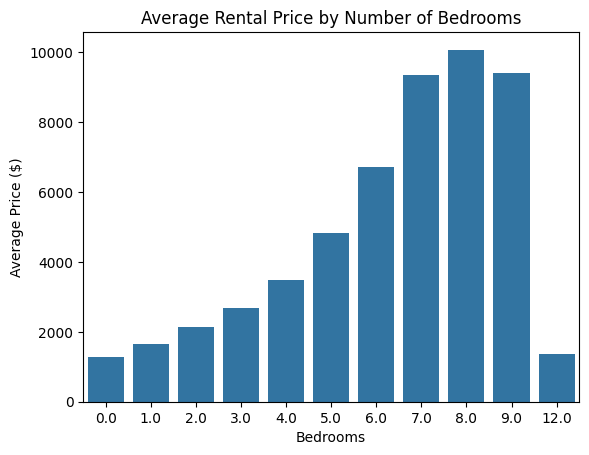

In [10]:
# Average price by number of bedrooms
avg_price_beds = df.groupby('beds')['price'].mean().sort_index()
sns.barplot(x=avg_price_beds.index, y=avg_price_beds.values)
plt.title("Average Rental Price by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Average Price ($)")
plt.show()

### 🔧 Try It Yourself – Part 5

1. Create a scatterplot of `baths` vs `price`.  
2. Group by `year` and plot the average price over time.

### In Your Response:
1. What trends or outliers do you see?

<Axes: xlabel='baths', ylabel='price'>

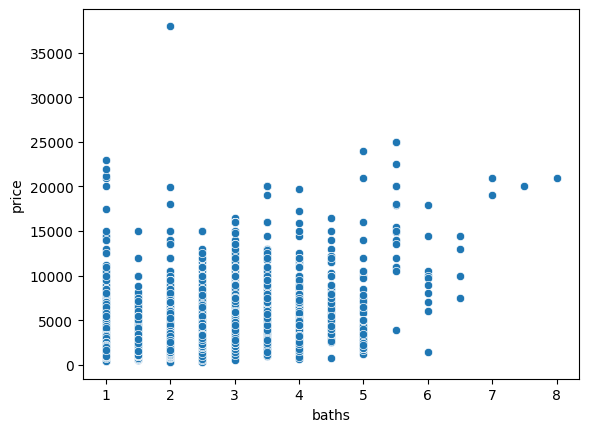

In [29]:
#1 🔧
sns.scatterplot(data=df,x="baths",y="price")

<Axes: xlabel='year', ylabel='price'>

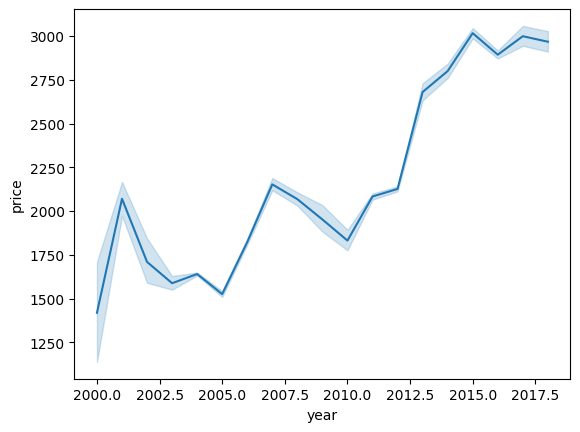

In [28]:
#2 🔧
sns.lineplot(data=df, x="year", y="price")

### ✍️ Your Response: 🔧
1. The outliers in the first graph are very easy to see as are very far removed from the overall cluster that the scatterplot is showing. For axmaple, there is one value at the 2 baths listing that is more than 3 times the price of the average for 2 bath apartments. the linechart doesnt show anything that crazy, but more the most part the newer the apartment the higher the average price rises.

## 🔧  Part 5: Reflection

Answer the following questions in the markdown cell below (no more than a few sentences per question required)

1. Which variables are most strongly correlated with rental price?
2. Are there patterns in how size (sqft) or number of bedrooms affects price?
3. Which neighborhoods or years show the highest prices?
4. What other visualizations or groupings might improve this analysis?

Use this section to summarize insights from both Labs 4 and 5.

### ✍️ Your Response: 🔧
1. The sqft value is most often the most closer related to the prices as without fail, if the size goes up the price increases in a related amount.
2. Yes the larger the two values grow, sqft or baths, the higher the price will reach by a fairly standard amount each increment.
3. Santa Rosa, Santa Cruz and San Mateo are the highest priced neighborhoods, and for the most part the newer the apartment the higher the price. The only execption to the year pricing is around 2001-2002 spiking higher than the next 10 years.
4. Running a proper regression between many of the variables would give some more insights into the combined dataset and allow us to determine an estimation of new apartments if there were to be added to the dataset.
5. Overall the values presented in the dataset used in labs 4 and 5 give great insights into property values using several different visualizations to better learn from the data. There are usually also key variables that allow for better insights into what the "outcome" variable might; for example, the larger the sqft of the apartment the price will simply be higher.

## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [30]:
!jupyter nbconvert --to html "lab_05_AldenEverett.ipynb"

[NbConvertApp] Converting notebook lab_05_AldenEverett.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 10 image(s).
[NbConvertApp] Writing 651732 bytes to lab_05_AldenEverett.html
